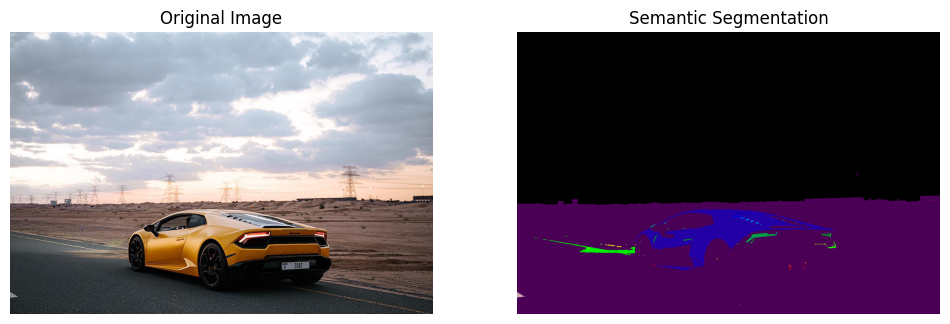

In [2]:
# Step 1: Install dependencies
!pip install numpy opencv-python matplotlib scikit-image

# Step 2: Import required libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.filters import sobel
from skimage.segmentation import watershed
from skimage.measure import label

# Step 3: Load the image
image_url = "car_sample.jpg"  # Replace with your image URL
image = io.imread(image_url)

# Convert to grayscale
gray = color.rgb2gray(image)

# Step 4: Apply Sobel filter for edge detection
edges = sobel(gray)

# Step 5: Create markers for Watershed algorithm
markers = np.zeros_like(gray, dtype=np.int32)
markers[gray < 0.3] = 1  # Background
markers[gray > 0.7] = 2  # Foreground

# Step 6: Apply Watershed segmentation
segmentation = watershed(edges, markers)

# Convert segmentation to a labeled image
labeled_image = label(segmentation)

# Step 7: Display the results
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(image)
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(labeled_image, cmap="nipy_spectral")
ax[1].set_title("Semantic Segmentation")
ax[1].axis("off")

plt.show()